In [1]:
!pip install lightgbm
!pip install xgboost


In [2]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
import joblib
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('houserentdhaka.csv')

In [4]:
df.head()

,Unnamed: 0,Location,Area,Bed,Bath,Price
0,0,"Block H, Bashundhara R-A, Dhaka","1,600 sqft",3,3,20 Thousand
1,1,"Farmgate, Tejgaon, Dhaka",900 sqft,2,2,20 Thousand
2,2,"Block B, Nobodoy Housing Society, Mohammadpur,...","1,250 sqft",3,3,18 Thousand
3,3,"Gulshan 1, Gulshan, Dhaka","2,200 sqft",3,4,75 Thousand
4,4,"Baridhara, Dhaka","2,200 sqft",3,3,75 Thousand


In [5]:
df.shape

(28800, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  28800 non-null  int64 
 1   Location    28800 non-null  object
 2   Area        28800 non-null  object
 3   Bed         28800 non-null  int64 
 4   Bath        28800 non-null  int64 
 5   Price       28800 non-null  object
dtypes: int64(3), object(3)
memory usage: 1.3+ MB


In [7]:
df.columns

Index(['Unnamed: 0', 'Location', 'Area', 'Bed', 'Bath', 'Price'], dtype='object')

In [8]:
# Rename the header of the column Price as Rent 
df.rename({'Price': 'Rent'}, axis=1, inplace=True)

In [9]:
# Treat unnecessary column "Unnamed: 0"
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [10]:
# Check for datatypes
df.dtypes

Location    object
Area        object
Bed          int64
Bath         int64
Rent        object
dtype: object

In [11]:
import pandas as pd

def clean_location_column(df):
    # Ensure the column is of string type
    column_name = 'Location'
    df[column_name] = df[column_name].astype(str)
    
    # Replace 'nan' strings with actual NaN values
    df[column_name] = df[column_name].replace('nan', pd.NA)
    
    # Print the initial state after conversion
    print("After conversion to string:\n", df[column_name].head())

    # Only apply string operations to non-null values and print intermediate steps
    df[column_name] = df[column_name].dropna().apply(lambda x: x.split(',')[:-1])
    print("After splitting and keeping all but the last part:\n", df[column_name].head())

    # Keep only the last part and strip whitespace
    df[column_name] = df[column_name].apply(lambda x: x[-1] if x else pd.NA)
    print("After selecting the last element:\n", df[column_name].head())
    
    df[column_name] = df[column_name].str.strip()
    print("After stripping whitespace:\n", df[column_name].head())

    return df
    
def clean_location_column1(df):
    # Ensure the column is of string type
    column_name = 'Location_encoded'
    df[column_name] = df[column_name].astype(str)
    
    # Replace 'nan' strings with actual NaN values
    df[column_name] = df[column_name].replace('nan', pd.NA)
    
    # Print the initial state after conversion
    print("After conversion to string:\n", df[column_name].head())

    # Only apply string operations to non-null values and print intermediate steps
    df[column_name] = df[column_name].dropna().apply(lambda x: x.split(',')[:-1])
    print("After splitting and keeping all but the last part:\n", df[column_name].head())

    # Keep only the last part and strip whitespace
    df[column_name] = df[column_name].apply(lambda x: x[-1] if x else pd.NA)
    print("After selecting the last element:\n", df[column_name].head())
    
    df[column_name] = df[column_name].str.strip()
    print("After stripping whitespace:\n", df[column_name].head())

    return df

In [12]:
clean_location_column(df)
print(df['Location'].head())
df.shape

After conversion to string:
 0                      Block H, Bashundhara R-A, Dhaka
1                             Farmgate, Tejgaon, Dhaka
2    Block B, Nobodoy Housing Society, Mohammadpur,...
3                            Gulshan 1, Gulshan, Dhaka
4                                     Baridhara, Dhaka
Name: Location, dtype: object
After splitting and keeping all but the last part:
 0                          [Block H,  Bashundhara R-A]
1                                 [Farmgate,  Tejgaon]
2    [Block B,  Nobodoy Housing Society,  Mohammadpur]
3                                [Gulshan 1,  Gulshan]
4                                          [Baridhara]
Name: Location, dtype: object
After selecting the last element:
 0     Bashundhara R-A
1             Tejgaon
2         Mohammadpur
3             Gulshan
4           Baridhara
Name: Location, dtype: object
After stripping whitespace:
 0    Bashundhara R-A
1            Tejgaon
2        Mohammadpur
3            Gulshan
4          Baridhara


(28800, 5)

In [13]:
# Remove sqft from the Area column and formating the digits
df['Area']=df['Area'].str.split(' ').str[:-1]
# Turn data in the location column into string from list type
df['Area'] = df['Area'].apply(lambda x: ''.join(map(str, x)))
# Remove comma from the digits
df['Area']=df['Area'].str.replace(',', '')
# Change datatype of the Area column to int64 from object
df['Area'] = df['Area'].astype(int)

print("Area Column Data Type:", df['Area'].dtypes)

df['Area'].head()

Area Column Data Type: int32


0    1600
1     900
2    1250
3    2200
4    2200
Name: Area, dtype: int32

In [14]:
# Format the Rent column as required and changing the datatype to int64
df['Rent']=df['Rent'].replace({"Thousand":"*1e3", "Lakh":"*1e5"}, regex=True).map(pd.eval).astype(int)

df['Rent'].head()

0    20000
1    20000
2    18000
3    75000
4    75000
Name: Rent, dtype: int32

In [15]:
# Check for nan values
df.isna().sum()

Location    13
Area         0
Bed          0
Bath         0
Rent         0
dtype: int64

In [16]:
# Drop the rows containing nan values in the Location column
df.dropna(inplace=True)

In [17]:
# **Exploratory Data Analysis (EDA)**


In [18]:
# Summarize quantitative data
df.describe()


,Area,Bed,Bath,Rent
count,28787.000000,28787.000000,28787.000000,28787.000000
mean,1057.316740,2.510995,2.369750,21009.554799
std,477.767777,0.601339,0.756555,21499.249095
min,200.000000,1.000000,1.000000,5000.000000
25%,700.000000,2.000000,2.000000,13000.000000
50%,900.000000,2.000000,2.000000,16000.000000
75%,1250.000000,3.000000,3.000000,22000.000000
max,6300.000000,6.000000,8.000000,650000.000000


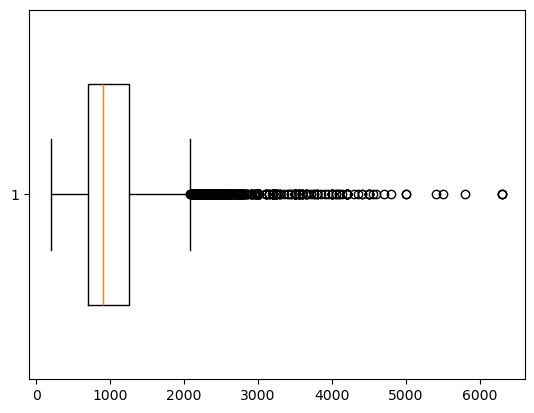

In [19]:
# Visualize quantitative data with boxplot
plt.boxplot(df["Area"], vert=False, widths = 0.6)
plt.show()

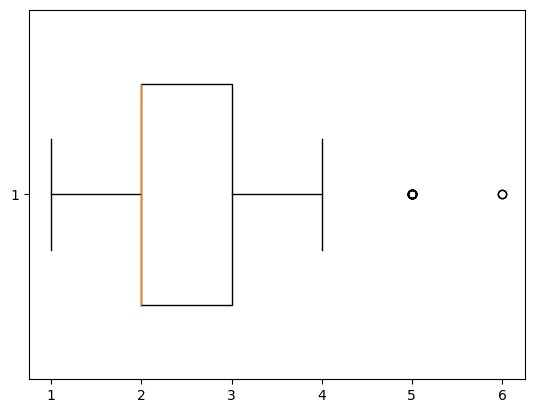

In [20]:
# Visualize quantitative data with boxplot
plt.boxplot(df["Bed"], vert=False, widths = 0.6)
plt.show()

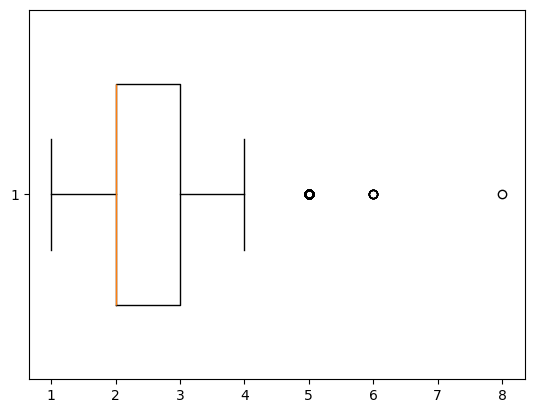

In [21]:
# Visualize quantitative data with boxplot
plt.boxplot(df["Bath"], vert=False, widths = 0.6)
plt.show()

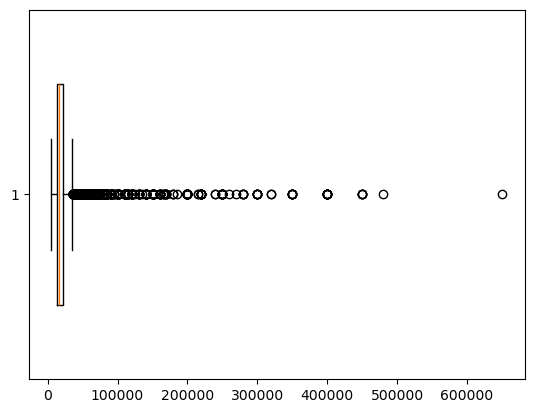

In [22]:
# Visualize quantitative data with boxplot
plt.boxplot(df["Rent"], vert=False, widths = 0.6)
plt.show()

In [23]:
# Summarize categorical data [Location]
df["Location"].value_counts()

Location
Mirpur             8451
Mohammadpur        3612
Uttara             2070
Badda              1831
Bashundhara R-A    1397
                   ... 
Shahbagh              7
Demra                 7
Keraniganj            3
Sadarghat             2
Banglamotors          2
Name: count, Length: 68, dtype: int64

In [24]:
# Summarize data [Bed]
df["Bed"].value_counts()

Bed
2    14272
3    12965
4     1063
1      461
5       24
6        2
Name: count, dtype: int64

In [25]:
# Summarize categorical data [Bath]
df["Bath"].value_counts()

Bath
2    15765
3     8465
1     2364
4     2046
5      139
6        7
8        1
Name: count, dtype: int64

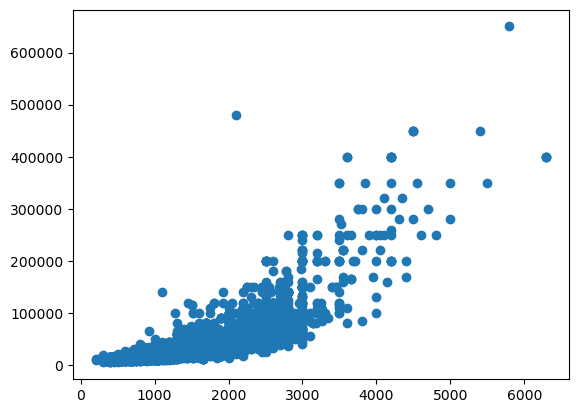

In [26]:
plt.scatter(df["Area"], df["Rent"])
plt.show()

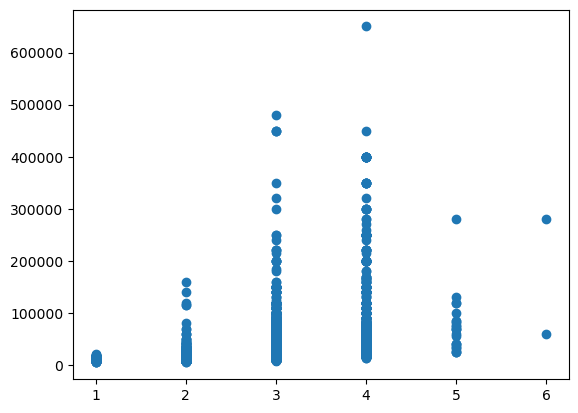

In [27]:
# Show relationship between Bed and Rent
plt.scatter(df["Bed"], df["Rent"])
plt.show()

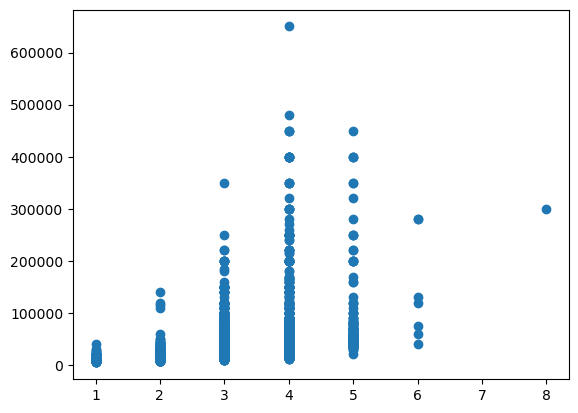

In [28]:
# Show relationship between Bath and Rent
plt.scatter(df["Bath"], df["Rent"])
plt.show()

In [29]:
# Show Pearson's Correlation
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr(method='pearson')
print(correlation_matrix)

          Area       Bed      Bath      Rent
Area  1.000000  0.774539  0.808109  0.747651
Bed   0.774539  1.000000  0.759157  0.426704
Bath  0.808109  0.759157  1.000000  0.481407
Rent  0.747651  0.426704  0.481407  1.000000


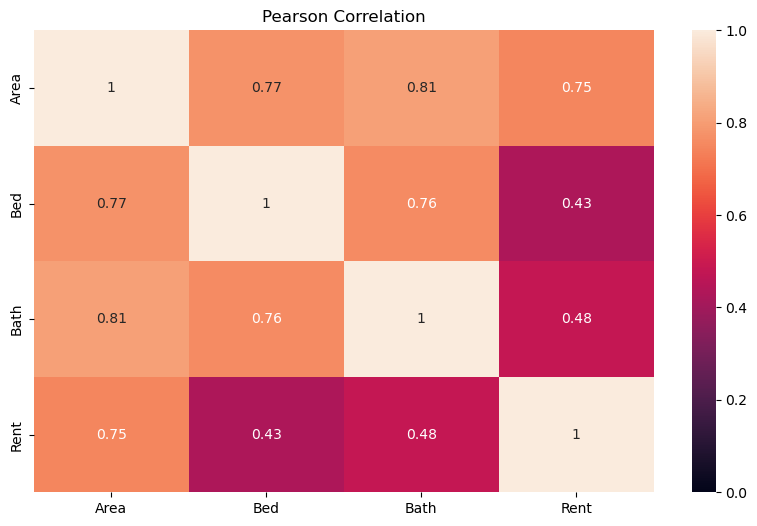

In [30]:
# Create heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr(method='pearson')

# Step 2: Create the heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(correlation_matrix, vmin=0, vmax=1, annot=True)
plt.title("Pearson Correlation")
plt.show()

In [31]:
# Get the names of all locations
df['Location'].unique()
print(df.shape)

(28787, 5)


In [32]:
df['Location'].unique()
value = 'Zafrabad'
# Find all rows that contain the specific value
rows_with_value = df[df.isin([value]).any(axis=1)]

# Find all columns that contain the specific value
columns_with_value = df.loc[:, df.isin([value]).any()]

# Display results
print("Rows containing the specific value:")
print(rows_with_value)

print("\nColumns containing the specific value:")
print(columns_with_value)



Rows containing the specific value:
       Location  Area  Bed  Bath   Rent
21964  Zafrabad   750    2     2  12000
23303  Zafrabad   800    2     2  13000
28367  Zafrabad   800    2     2  15000
28369  Zafrabad   800    2     2  15000
28370  Zafrabad   800    2     2  15000
28371  Zafrabad   800    2     2  12000
28511  Zafrabad   800    2     2  15000

Columns containing the specific value:
              Location
0      Bashundhara R-A
1              Tejgaon
2          Mohammadpur
3              Gulshan
4            Baridhara
...                ...
28795           Mirpur
28796  Bashundhara R-A
28797        Motijheel
28798          Rampura
28799            Badda

[28787 rows x 1 columns]


In [33]:
# Columns to normalize
columns_to_normalize = ['Area', 'Bed', 'Bath']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

joblib.dump(scaler, 'scaler.pkl')

# Display the first 5 rows
df.head()

,Location,Area,Bed,Bath,Rent
0,Bashundhara R-A,0.229508,0.4,0.285714,20000
1,Tejgaon,0.114754,0.2,0.142857,20000
2,Mohammadpur,0.172131,0.4,0.285714,18000
3,Gulshan,0.327869,0.4,0.428571,75000
4,Baridhara,0.327869,0.4,0.285714,75000


In [34]:
# One-hot encode the 'Location' column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Location_encoded'] = encoder.fit_transform(df['Location'])

# Save the trained LabelEncoder to a file
joblib.dump(encoder, 'label_encoder.pkl')


['label_encoder.pkl']

In [35]:
df.head()

,Location,Area,Bed,Bath,Rent,Location_encoded
0,Bashundhara R-A,0.229508,0.4,0.285714,20000,12
1,Tejgaon,0.114754,0.2,0.142857,20000,63
2,Mohammadpur,0.172131,0.4,0.285714,18000,43
3,Gulshan,0.327869,0.4,0.428571,75000,18
4,Baridhara,0.327869,0.4,0.285714,75000,9


In [36]:
# Add the one-hot encoded Location columns to the features
features = df[['Area', 'Bed', 'Bath'] + [col for col in df.columns if 'Location_' in col]]

# Define the target variable
target = df['Rent']

# Split the dataset into training and test sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

print("Shape of X_train", X_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train (23029, 4)
Shape of X_test (5758, 4)
Shape of y_train (23029,)
Shape of y_test (5758,)


In [37]:
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer

In [38]:
column_trans = make_column_transformer(
    (OneHotEncoder(sparse_output=False), ['Location']),
    remainder='passthrough'
)

In [39]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error: ", np.sqrt(lr_mse))

Root Mean Squared Error:  13468.196110657773


In [40]:
r2_score(y_test,y_pred)

0.6309295935183539

In [41]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error: ", np.sqrt(rf_mse))
r2_score(y_test,y_pred)

Root Mean Squared Error:  7214.432655376515


0.8941003005395908

In [42]:
r2_score(y_test,y_pred)

0.8941003005395908

In [43]:
# XGBoost Regressor
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
xgb_mse = mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error: ", np.sqrt(xgb_mse))

Root Mean Squared Error:  8081.352962686229


In [44]:
r2_score(y_test,y_pred)

0.8671203391165402

In [45]:
# Ridge Regressor
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error: ", np.sqrt(ridge_mse))

Root Mean Squared Error:  13482.735391994089


In [46]:
r2_score(y_test,y_pred)

0.6301323204745781

In [47]:
# Lasso Regressor
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error: ", np.sqrt(lasso_mse))

Root Mean Squared Error:  13469.246204048934


In [48]:
r2_score(y_test,y_pred)

0.6308720396336043

In [49]:
# LightGBM Regressor
lgbm = LGBMRegressor(n_estimators=100)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
lgbm_mse = mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error: ", np.sqrt(lgbm_mse))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 289
[LightGBM] [Info] Number of data points in the train set: 23029, number of used features: 4
[LightGBM] [Info] Start training from score 20944.320466
Root Mean Squared Error:  7790.291554052187


In [50]:
r2_score(y_test,y_pred)

0.8765196694915631

In [51]:
random_forest = RandomForestRegressor()

In [52]:
from sklearn.pipeline import Pipeline

In [53]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('random_forest', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42))
])

In [54]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('random_forest',
                 RandomForestRegressor(max_depth=10, random_state=42))])

In [55]:
y_pred = pipeline.predict(X_test)

In [56]:
r2_score(y_test,y_pred)

0.8918629313851522

In [57]:
import pickle

In [58]:
pickle.dump(pipeline, open('randomforest.pkl','wb'))

In [59]:
df.head()

,Location,Area,Bed,Bath,Rent,Location_encoded
0,Bashundhara R-A,0.229508,0.4,0.285714,20000,12
1,Tejgaon,0.114754,0.2,0.142857,20000,63
2,Mohammadpur,0.172131,0.4,0.285714,18000,43
3,Gulshan,0.327869,0.4,0.428571,75000,18
4,Baridhara,0.327869,0.4,0.285714,75000,9


In [60]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error: ", np.sqrt(rf_mse))
r2_score(y_test,y_pred)

Root Mean Squared Error:  7214.432655376515


0.8941003005395908

In [61]:
random_forest = RandomForestRegressor()

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('random_forest', RandomForestRegressor(n_estimators=300, max_depth=40, random_state=42))
])

pipeline.fit(X_train,y_train)

y_pred = pipeline.predict(X_test)

r2_score(y_test,y_pred)

0.8945002020502701

In [62]:
location_columns = [col for col in df.columns if col.startswith('Location_')]

print(location_columns)

['Location_encoded']


In [63]:
scaler = joblib.load('scaler.pkl')
label_encoder = joblib.load('label_encoder.pkl')

# Sample input data as a dictionary (keys should match the column names)
input_data = {
    'Area': ['3000'],     # Replace with the actual area as a string
    'Bed': [4],           # Number of bedrooms as an integer
    'Bath': [4],          # Number of bathrooms as an integer
    'Location': ['Gulshan 2, Gulshan, Dhaka']  # Location as a string
}

# Convert input data to a DataFrame
input_df = pd.DataFrame(input_data)

# Clean the 'Location' column (assuming this function is defined)
input_df = clean_location_column(input_df)

# Apply label encoding to 'Location' column
input_df['Location_encoded'] = label_encoder.transform(input_df['Location'])

# List of columns to normalize
columns_to_normalize = ['Area', 'Bed', 'Bath']

# Preprocess the 'Area' column to convert from string to numeric if needed
input_df['Area'] = input_df['Area'].astype(float)

# Scale the numeric columns ('Area', 'Bed', 'Bath')
input_scaled = scaler.transform(input_df[columns_to_normalize])

# Combine the scaled numeric features and the encoded 'Location' column
input_scaled_df = pd.DataFrame(input_scaled, columns=columns_to_normalize)
input_scaled_df['Location_encoded'] = input_df['Location_encoded']

# Make predictions using the model pipeline (assuming 'pipeline' is already defined)
prediction = pipeline.predict(input_scaled_df)
print("Prediction:", prediction)

After conversion to string:
 0    Gulshan 2, Gulshan, Dhaka
Name: Location, dtype: object
After splitting and keeping all but the last part:
 0    [Gulshan 2,  Gulshan]
Name: Location, dtype: object
After selecting the last element:
 0     Gulshan
Name: Location, dtype: object
After stripping whitespace:
 0    Gulshan
Name: Location, dtype: object
Prediction: [150000.]


In [64]:
print("Training columns:", X_train.columns)

# Check the columns in the input data
print("Input columns:", input_df.columns)

Training columns: Index(['Area', 'Bed', 'Bath', 'Location_encoded'], dtype='object')
Input columns: Index(['Area', 'Bed', 'Bath', 'Location', 'Location_encoded'], dtype='object')
